In [12]:
import pandas as pd
import os
import json
from pprint import pprint
from pandas import DataFrame, Series

In [13]:
# import folium
# import plotly.plotly as py
# import plotly.graph_objs as go

In [14]:
os.chdir('/Users/bellepeng/Desktop/Metis/github/project_benson/Yelp')
!pwd

/Users/bellepeng/Desktop/Metis/github/project_benson/Yelp


## Extract Yelp Data

In [15]:
def read_yelp(filename):
    zip_list = []
    name_list = []
    price_list = []
    rating_list = []
    review_ct_list = []
    lat=[]
    long=[]
    
    with open(filename, 'r') as myfile:
        data=json.loads(myfile.read())
        Arr=data['businesses']

        for j in range(len(Arr)):
            if not Arr[j]['location']['zip_code']: zip_code=None
            else: zip_code=Arr[j]['location']['zip_code']
            zip_list.append(zip_code)

            if not Arr[j]['coordinates']['latitude']: latitude=None
            else: latitude=Arr[j]['coordinates']['latitude']
            lat.append(latitude)

            if not Arr[j]['coordinates']['longitude']: longitude=None
            else: longitude=Arr[j]['coordinates']['longitude']
            long.append(longitude)

            if not Arr[j]['name']: name=None
            else: name=Arr[j]['name']
            name_list.append(name)

            if 'price' not in Arr[j]: price=None
            else: price=Arr[j]['price']
            price_list.append(price)

            if not Arr[j]['rating']: rating=None
            else: rating=Arr[j]['rating']
            rating_list.append(rating)

            if not Arr[j]['review_count']: review_count=None
            else: review_count=Arr[j]['review_count']
            review_ct_list.append(review_count)

            yelpMaster={'name': name_list, 
                        'zip_code': zip_list,
                        'price': price_list,
                        'rating': rating_list,
                        'review_count': review_ct_list,
                        'latitude': lat,
                        'longitude': long
                       }
    dfi=DataFrame(yelpMaster)
    return dfi

In [16]:
read_yelp('yelp19.json').head(5)

,latitude,longitude,name,price,rating,review_count,zip_code
0,40.756740,-73.993461,Snax Spot,$$,4.5,166,10018
1,40.742100,-73.984610,Bread & Tulips,$$,4.0,222,10016
2,40.734387,-73.992154,Vapiano NYC,$$,3.5,1013,10003
3,40.732030,-73.983770,Crocodile Lounge,$,3.5,748,10003
4,40.745406,-74.002403,Le Grainne Cafe,$$,4.0,561,10011


In [17]:
for i in range(1,21):
    filename=("yelp"+str(i)+".json")
    print(filename)
    dfi=read_yelp(filename)
    
    if i==1: df=dfi
    else: df=pd.concat([df, dfi])
    
    print(df.shape)

df.head(5)

yelp1.json
(50, 7)
yelp2.json
(100, 7)
yelp3.json
(150, 7)
yelp4.json
(200, 7)
yelp5.json
(250, 7)
yelp6.json
(300, 7)
yelp7.json
(350, 7)
yelp8.json
(400, 7)
yelp9.json
(450, 7)
yelp10.json
(500, 7)
yelp11.json
(550, 7)
yelp12.json
(600, 7)
yelp13.json
(650, 7)
yelp14.json
(700, 7)
yelp15.json
(750, 7)
yelp16.json
(800, 7)
yelp17.json
(850, 7)
yelp18.json
(900, 7)
yelp19.json
(950, 7)
yelp20.json
(999, 7)


,latitude,longitude,name,price,rating,review_count,zip_code
0,40.739020,-73.990650,Thai Villa,$$,4.5,1670,10003
1,40.763540,-73.986530,Ippudo Westside,$$,4.0,3150,10019
2,40.745190,-73.988240,KazuNori | The Original Hand Roll Bar,$$,4.5,473,10001
3,40.755850,-73.980780,Xi'an Famous Foods,$,4.0,1349,10036
4,40.752192,-73.985756,Culture Espresso,$$,4.0,812,10018


__Data Quality Check__

In [18]:
# df[df['name']=="The Halal Guys"]
df[df['name']=="Peter Luger"]

,latitude,longitude,name,price,rating,review_count,zip_code
44,40.709945,-73.962478,Peter Luger,$$$$,4.0,4696,11211


In [19]:
df.sort_values('review_count', ascending = False).head(5)

,latitude,longitude,name,price,rating,review_count,zip_code
20,40.721515,-73.995735,Lombardi's Pizza,$$,4.0,5490,10012
20,40.714669,-73.997760,Joe's Shanghai,$$,4.0,5188,10013
44,40.709945,-73.962478,Peter Luger,$$$$,4.0,4696,11211
23,40.702569,-73.993248,Grimaldi's,$$,3.5,4274,11201
49,40.721128,-73.983933,Clinton Street Baking Company,$$,4.0,4185,10002


In [20]:
df.loc[(df['price']=='$$$$')].head(5)

,latitude,longitude,name,price,rating,review_count,zip_code
12,40.743120,-74.007185,Morimoto,$$$$,4.0,2765,10011
23,40.768153,-73.982763,Per Se,$$$$,4.5,1399,10019
33,40.751800,-73.978960,Benjamin Steakhouse,$$$$,4.0,887,10017
42,40.734186,-73.993696,Gotham Bar and Grill,$$$$,4.5,1431,10003
1,40.746840,-73.981830,Wolfgang's Steakhouse,$$$$,4.0,854,10016


In [21]:
df.loc[df['name']=='Morimoto']['price']

12    $$$$
Name: price, dtype: object

In [22]:
length=df['price'].apply(lambda x: (x and len(x)))
length.value_counts()

2.0    607
3.0    191
1.0    139
4.0     51
Name: price, dtype: int64

__Define New Vars__

In [23]:
# Define the Expensive Restaurants
df['is_expensive'] = df['price'].apply(lambda x: (x and (x[:3] == '$$$')))
df.sort_values('is_expensive', ascending=True, inplace=True)
df.head()

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive
0,40.739020,-73.990650,Thai Villa,$$,4.5,1670,10003,False
23,40.702569,-73.993248,Grimaldi's,$$,3.5,4274,11201,False
24,40.753969,-73.968722,Nishida Sho-ten,$$,4.0,612,10017,False
25,40.751171,-73.988136,Shake Shack,$$,4.0,232,10018,False
26,40.774731,-73.954549,Luke's Lobster Upper East Side,$$,4.0,1077,10028,False


In [24]:
df.tail()

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive
46,40.744895,-73.958304,Gantry Plaza State Park,None,5.0,295,11101,None
3,40.730787,-73.997598,Washington Square Park,None,4.5,517,10011,None
4,40.735259,-73.990753,Union Square,None,4.0,394,10003,None
17,40.751910,-73.975530,Chrysler Building,None,4.5,114,10174,None
30,40.701626,-73.997211,Brooklyn Bridge Park,None,4.5,472,11201,None


In [25]:
df[(df['price']=='$$$$')].head()

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive
31,40.767568,-73.952815,Tanoshi Sushi Sake Bar,$$$$,4.5,516,10021,True
48,40.764958,-73.976206,Quality Meats,$$$$,4.0,1714,10019,True
29,40.724776,-73.991682,Momofuku Ko,$$$$,4.5,219,10003,True
23,40.751494,-73.979850,Benjamin Prime,$$$$,4.5,145,10016,True
13,40.754546,-73.982556,Gabriel Kreuther,$$$$,4.5,284,10036,True


In [26]:
# Define the Popular Restaurants
df['is_popular'] = df['review_count'].apply(lambda x: (x>=1000))
df.sort_values('is_popular', ascending=True, inplace=True)
df.head(5)

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular
24,40.729770,-73.999390,Top Thai Greenwich,$$,4.5,593,10012,False,False
31,40.750273,-73.984495,TONCHIN NEW YORK,$$,4.5,346,10018,False,False
32,40.746300,-73.984809,Take31,$$,4.0,433,10016,False,False
33,40.745329,-73.984526,Blank Slate Coffee + Kitchen,$$,4.0,482,10016,False,False
39,40.763940,-73.988340,B Side Pizza & Wine Bar,$$,4.5,878,10019,False,False


In [27]:
df.tail(5)

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular
34,40.727000,-73.988440,The Mermaid Inn,$$,4.0,1196,10003,False,True
44,40.730212,-73.983724,S'MAC,$$,3.5,2037,10003,False,True
38,40.719360,-73.996670,Banh Mi Saigon,$,4.0,1340,10013,False,True
43,40.722720,-73.983340,Root & Bone,$$,4.0,1335,10009,False,True
0,40.739020,-73.990650,Thai Villa,$$,4.5,1670,10003,False,True


__De-Dup repeated records__

In [28]:
df2=df.drop_duplicates(keep='first')
df2.head()
df2.shape

(950, 9)

In [29]:
df.loc[df['name']=='Momofuku Ko']

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular
29,40.724776,-73.991682,Momofuku Ko,$$$$,4.5,219,10003,True,False
30,40.724776,-73.991682,Momofuku Ko,$$$$,4.5,219,10003,True,False


In [30]:
df2.loc[df2['name']=='Momofuku Ko']

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular
29,40.724776,-73.991682,Momofuku Ko,$$$$,4.5,219,10003,True,False


#### If I want to save it as CSV and read it back 
df.to_csv('Yelp.csv')  
df_in=pd.read_csv('Yelp.csv')  
df_in.head(10)  
df_in.drop('Unnamed: 0', axis=1, inplace=True)  
df_in.head(10) 
  
_Merge Example:_  
result = pd.merge(left, right, on='key')

__Add in Neighborhood Names__

In [47]:
os.chdir('/Users/bellepeng/Desktop/Metis/github/project_benson')
!pwd

/Users/bellepeng/Desktop/Metis/github/project_benson


In [32]:
zips=pd.read_csv('nyc_zip.csv')
zips.head()

,Neighborhood,Zips
0,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468"
2,High Bridge and Morrisania,"10451, 10452, 10456"
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Kingsbridge and Riverdale,"10463, 10471"


In [33]:
zips = (zips.set_index(zips.columns.drop('Zips',1).tolist())
   ...:    .Zips.str.split(',', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'Zips'})
   ...:    .loc[:, zips.columns]
   ...: )
zips.head()

,Neighborhood,Zips
0,Central Bronx,10453
1,Central Bronx,10457
2,Central Bronx,10460
3,Bronx Park and Fordham,10458
4,Bronx Park and Fordham,10467


In [34]:
zips.rename(columns={'Zips': 'zip_code'}, inplace=True)
zips.head()

,Neighborhood,zip_code
0,Central Bronx,10453
1,Central Bronx,10457
2,Central Bronx,10460
3,Bronx Park and Fordham,10458
4,Bronx Park and Fordham,10467


In [35]:
zips['zip_code']=zips['zip_code'].astype(str).str.strip()
df['zip_code']=df['zip_code'].str.strip()

In [36]:
df3 = pd.merge(df2, zips, how='left', on='zip_code')
df3.head()

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular,Neighborhood
0,40.729770,-73.999390,Top Thai Greenwich,$$,4.5,593,10012,False,False,Greenwich Village and Soho
1,40.750273,-73.984495,TONCHIN NEW YORK,$$,4.5,346,10018,False,False,Chelsea and Clinton
2,40.746300,-73.984809,Take31,$$,4.0,433,10016,False,False,Gramercy Park and Murray Hill
3,40.745329,-73.984526,Blank Slate Coffee + Kitchen,$$,4.0,482,10016,False,False,Gramercy Park and Murray Hill
4,40.763940,-73.988340,B Side Pizza & Wine Bar,$$,4.5,878,10019,False,False,Chelsea and Clinton


__Merge to Station Names__

In [52]:
stations=pd.read_csv('zipcode (1).csv')
stations.head()

,station,zip_code
0,59 ST,10065
1,5 AV/59 ST,10019
2,57 ST-7 AV,10106
3,49 ST,10020
4,TIMES SQ-42 ST,10018


In [53]:
df2_5=df3

In [62]:
stations['zip_code']=stations['zip_code'].astype(str).str.strip()
df2_5['zip_code']=df2_5['zip_code'].str.strip()

In [66]:
df3 = pd.merge(df2_5, stations, how='right', on='zip_code')
df3.loc[pd.isnull(df3['station'])]

,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular,Neighborhood,station


### Analyze by Zip
__Questions I want to answer__
- Which zip has the most restaurants?
- Which zip has the most popular resturants?
- Which zip has the most expensive restaurants?

In [37]:
df3['price'].value_counts()
df3['price'].value_counts()/(df3.shape[0])

$$      0.604211
$$$     0.192632
$       0.138947
$$$$    0.052632
Name: price, dtype: float64

__Top Zips with restaurants__

In [67]:
def yelp_stats(topzips):
    df3_sub=df3.loc[df3['zip_code'].apply(lambda x: x in topzips)]
    print("Number of restaurants in these zips: "+ str(df3_sub.shape[0]))
    
    # The Top zips with the most restaurants
    df3_sub_most_rest=df3_sub.groupby(['zip_code', 'station', 'Neighborhood']).review_count.agg(['count'])
    df3_sub_most_rest.rename(columns={'count': 'num_of_restaurants'}, inplace=True)
    df3_sub_most_rest['num_of_restaurants'].sum()
    df3_sub_most_rest.sort_values('num_of_restaurants', ascending = False, inplace=True)
    
    # The Top zips with the most POPULAR restaurants
    df3_sub_popular=df3_sub.groupby(['zip_code', 'station', 'Neighborhood']).is_popular.agg(['sum'])
    df3_sub_popular.rename(columns={'sum': 'num_of_popular_rest'}, inplace=True)
    df3_sub_popular.sort_values('num_of_popular_rest', ascending = False, inplace=True)
    
    # The Top zips with the most EXPENSIVE restaurants
    df3_sub_exp=df3_sub.groupby(['zip_code', 'station', 'Neighborhood']).is_expensive.agg(['sum'])
    df3_sub_exp.rename(columns={'sum': 'num_of_expensive_rest'}, inplace=True)
    df3_sub_exp.sort_values('num_of_expensive_rest', ascending = False, inplace=True)
    
    return {"The most Restaurants": df3_sub_most_rest, 
            "Most Popular Restaurants": df3_sub_popular,
            "Most Expensive Restaurants": df3_sub_exp
           }

In [68]:
topzips=['10119', '10018', '11003', '10003', '10010', '10038', '10028', '10035', 
         '10023', '10013', '10065', '10025', '10020', '11354', '10011', '10001',
         '11373'
        ]
results=yelp_stats(topzips)

Number of restaurants in these zips: 1729


In [69]:
results['The most Restaurants']

num_of_restaurants
zip_code station         Neighborhood                                     
10003    14 ST-UNION SQ  Lower East Side                               114
         2 AV            Lower East Side                               114
         3 AV            Lower East Side                               114
         8 ST-NYU        Lower East Side                               114
         ASTOR PL        Lower East Side                               114
10001    28 ST           Chelsea and Clinton                            84
         34 ST-HUDSON YD Chelsea and Clinton                            84
         THIRTY ST       Chelsea and Clinton                            84
         THIRTY THIRD ST Chelsea and Clinton                            84
         33 ST           Chelsea and Clinton                            84
10011    18 ST           Chelsea and Clinton                            59
         9TH STREET      Chelsea and Clinton                            59
         6 AV            Chelsea and Clinton                            59
         TWENTY THIRD ST Chelsea and Clinton                            59
         14TH STREET     Chelsea and Clinton                            59
         14 ST           Chelsea and Clinton                            59
10010    23 ST           Gramercy Park and Murray Hill                  58
10018    42 ST-PORT AUTH Chelsea and Clinton                            57
         GRD CNTRL-42 ST Chelsea and Clinton                            57
         CITY / BUS      Chelsea and Clinton                            57
         TIMES SQ-42 ST  Chelsea and Clinton                            57
10013    FRANKLIN ST     Greenwich Village and Soho                     19
         CHAMBERS ST     Greenwich Village and Soho                     19
         CANAL ST        Greenwich Village and Soho                     19
10023    59 ST COLUMBUS  Upper West Side                                 4
         66 ST-LINCOLN   Upper West Side                                 4
         72 ST           Upper West Side                                 4
10020    47-50 STS ROCK  Chelsea and Clinton                             3
         49 ST           Chelsea and Clinton                             3
10028    86 ST           Upper East Side                                 3
10065    59 ST           Upper East Side                                 3
         LEXINGTON AV/63 Upper East Side                                 3

In [70]:
results['Most Popular Restaurants']

num_of_popular_rest
zip_code station         Neighborhood                                      
10003    14 ST-UNION SQ  Lower East Side                                 48
         2 AV            Lower East Side                                 48
         3 AV            Lower East Side                                 48
         8 ST-NYU        Lower East Side                                 48
         ASTOR PL        Lower East Side                                 48
10011    TWENTY THIRD ST Chelsea and Clinton                             17
         9TH STREET      Chelsea and Clinton                             17
         14 ST           Chelsea and Clinton                             17
         14TH STREET     Chelsea and Clinton                             17
         18 ST           Chelsea and Clinton                             17
         6 AV            Chelsea and Clinton                             17
10013    FRANKLIN ST     Greenwich Village and Soho                       9
         CHAMBERS ST     Greenwich Village and Soho                       9
         CANAL ST        Greenwich Village and Soho                       9
10001    33 ST           Chelsea and Clinton                              7
         28 ST           Chelsea and Clinton                              7
         THIRTY THIRD ST Chelsea and Clinton                              7
         THIRTY ST       Chelsea and Clinton                              7
         34 ST-HUDSON YD Chelsea and Clinton                              7
10010    23 ST           Gramercy Park and Murray Hill                    4
10023    59 ST COLUMBUS  Upper West Side                                  4
         66 ST-LINCOLN   Upper West Side                                  4
         72 ST           Upper West Side                                  4
10018    42 ST-PORT AUTH Chelsea and Clinton                              2
         CITY / BUS      Chelsea and Clinton                              2
         GRD CNTRL-42 ST Chelsea and Clinton                              2
         TIMES SQ-42 ST  Chelsea and Clinton                              2
10028    86 ST           Upper East Side                                  2
10065    59 ST           Upper East Side                                  2
         LEXINGTON AV/63 Upper East Side                                  2
10020    47-50 STS ROCK  Chelsea and Clinton                              0
         49 ST           Chelsea and Clinton                              0

In [71]:
results['Most Expensive Restaurants']

num_of_expensive_rest
zip_code station         Neighborhood                                        
10003    14 ST-UNION SQ  Lower East Side                                   22
         2 AV            Lower East Side                                   22
         3 AV            Lower East Side                                   22
         8 ST-NYU        Lower East Side                                   22
         ASTOR PL        Lower East Side                                   22
10011    TWENTY THIRD ST Chelsea and Clinton                               20
         14 ST           Chelsea and Clinton                               20
         14TH STREET     Chelsea and Clinton                               20
         18 ST           Chelsea and Clinton                               20
         6 AV            Chelsea and Clinton                               20
         9TH STREET      Chelsea and Clinton                               20
10010    23 ST           Gramercy Park and Murray Hill                     17
10018    42 ST-PORT AUTH Chelsea and Clinton                                7
         TIMES SQ-42 ST  Chelsea and Clinton                                7
         GRD CNTRL-42 ST Chelsea and Clinton                                7
         CITY / BUS      Chelsea and Clinton                                7
10001    28 ST           Chelsea and Clinton                                7
         33 ST           Chelsea and Clinton                                7
         THIRTY THIRD ST Chelsea and Clinton                                7
         THIRTY ST       Chelsea and Clinton                                7
         34 ST-HUDSON YD Chelsea and Clinton                                7
10013    CANAL ST        Greenwich Village and Soho                         5
         CHAMBERS ST     Greenwich Village and Soho                         5
         FRANKLIN ST     Greenwich Village and Soho                         5
10023    59 ST COLUMBUS  Upper West Side                                    2
         66 ST-LINCOLN   Upper West Side                                    2
         72 ST           Upper West Side                                    2
10020    47-50 STS ROCK  Chelsea and Clinton                                1
         49 ST           Chelsea and Clinton                                1
10028    86 ST           Upper East Side                                    1
10065    59 ST           Upper East Side                                    1
         LEXINGTON AV/63 Upper East Side                                    1

In [137]:
pop_rest=pd.DataFrame(results['Most Popular Restaurants'])
pop_rest=pop_rest.reset_index()
pop_rest.head()

,zip_code,station,Neighborhood,num_of_popular_rest
0,10003,14 ST-UNION SQ,Lower East Side,48
1,10003,2 AV,Lower East Side,48
2,10003,3 AV,Lower East Side,48
3,10003,8 ST-NYU,Lower East Side,48
4,10003,ASTOR PL,Lower East Side,48


In [138]:
exp_rest=pd.DataFrame(results['Most Expensive Restaurants'])
exp_rest=exp_rest.reset_index()
exp_rest.head()

,zip_code,station,Neighborhood,num_of_expensive_rest
0,10003,14 ST-UNION SQ,Lower East Side,22
1,10003,2 AV,Lower East Side,22
2,10003,3 AV,Lower East Side,22
3,10003,8 ST-NYU,Lower East Side,22
4,10003,ASTOR PL,Lower East Side,22


In [142]:
pop_rest.drop_duplicates(keep='first', subset=['zip_code', 'num_of_popular_rest'], inplace=True)
pop_rest.head()

,zip_code,station,Neighborhood,num_of_popular_rest
0,10003,14 ST-UNION SQ,Lower East Side,48
5,10011,TWENTY THIRD ST,Chelsea and Clinton,17
11,10013,FRANKLIN ST,Greenwich Village and Soho,9
14,10001,33 ST,Chelsea and Clinton,7
19,10010,23 ST,Gramercy Park and Murray Hill,4


In [143]:
exp_rest.drop_duplicates(keep='first', subset=['zip_code', 'num_of_expensive_rest'], inplace=True)
exp_rest.head()

,zip_code,station,Neighborhood,num_of_expensive_rest
0,10003,14 ST-UNION SQ,Lower East Side,22
5,10011,TWENTY THIRD ST,Chelsea and Clinton,20
11,10010,23 ST,Gramercy Park and Murray Hill,17
12,10018,42 ST-PORT AUTH,Chelsea and Clinton,7
16,10001,28 ST,Chelsea and Clinton,7


In [150]:
pop_exp_rest = pd.merge(left=pop_rest, right=exp_rest, how='outer', on=['zip_code', 'station', 'Neighborhood'])
pop_exp_rest.set_index('zip_code', inplace=True)
pop_exp_rest.head(3)

,station,Neighborhood,num_of_popular_rest,num_of_expensive_rest
zip_code,,,,
10003,14 ST-UNION SQ,Lower East Side,48.0,22.0
10011,TWENTY THIRD ST,Chelsea and Clinton,17.0,20.0
10013,FRANKLIN ST,Greenwich Village and Soho,9.0,NaN


__Graphing__

In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

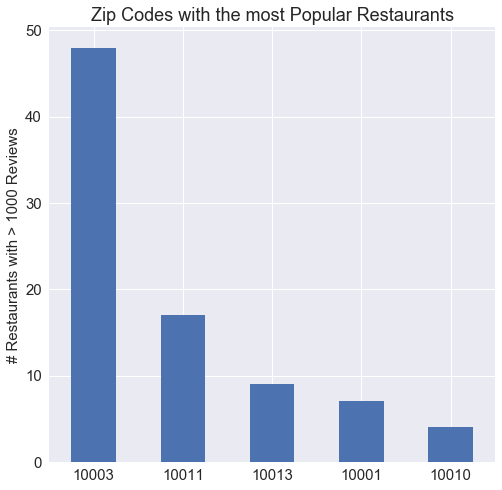

In [178]:
# Plot Popular Restaurants by Zip Code
pop_exp_rest2=pop_exp_rest.sort_values('num_of_popular_rest', ascending = False)
plt.style.use("seaborn")
ax = pop_exp_rest2['num_of_popular_rest'].head(5).plot(kind='bar', rot=0, 
                    title ="Zip Codes with the most Popular Restaurants", 
                    figsize=(8, 8), fontsize=15, legend=False)
ax.set_xlabel("", fontsize=15)
ax.title.set_size(18)
ax.set_ylabel("# Restaurants with > 1000 Reviews", fontsize=15)
# ax.legend(["Zips w/ the most Popular restaurants"], fontsize=15);
plt.show()

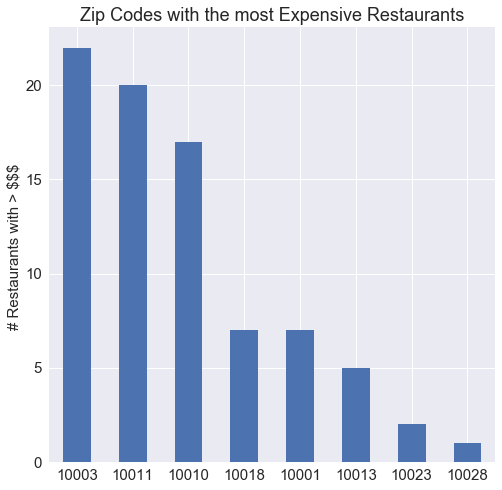

In [180]:
pop_exp_rest2=pop_exp_rest.sort_values('num_of_expensive_rest', ascending = False)
plt.style.use("seaborn")
ax = pop_exp_rest2['num_of_expensive_rest'].head(8).plot(kind='bar', rot=0, 
                    title ="Zip Codes with the most Expensive Restaurants", 
                    figsize=(8, 8), fontsize=15, legend=False)
ax.set_xlabel("", fontsize=15)
ax.title.set_size(18)
ax.set_ylabel("# Restaurants with > $$$ ", fontsize=15)
plt.show()

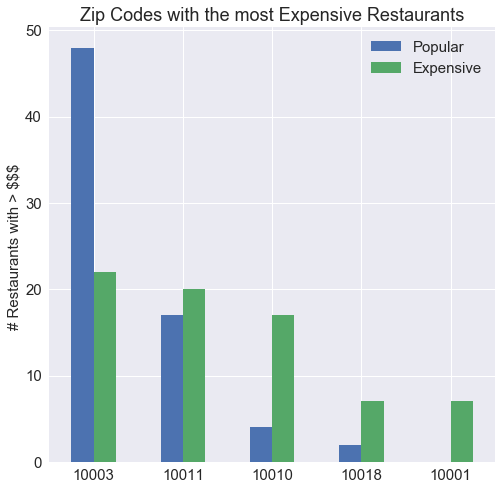

In [181]:
pop_exp_rest2=pop_exp_rest.sort_values(['num_of_expensive_rest', 'num_of_popular_rest'], ascending = False)
plt.style.use("seaborn")
ax = pop_exp_rest2.head(5).plot(kind='bar', rot=0, 
                        title ="Zip Codes with the most Expensive Restaurants", 
                        figsize=(8, 8), fontsize=15, legend=False)
ax.set_xlabel("", fontsize=15)
ax.set_ylabel("# Restaurants with > $$$ ", fontsize=15)
ax.title.set_size(18)
ax.legend(["Popular", "Expensive"], fontsize=15);
plt.show()

__Which restaurants are in these stations?__

In [246]:
# stations=['34 ST-PENN STA', 'TWENTY THIRD ST', '14 ST-UNION SQ']
stations=['14 ST-UNION SQ']

In [247]:
target=df3.loc[df3['station'].apply(lambda x: x in stations)]
target.sort_values(['review_count'], ascending = False, inplace=True)
target.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,latitude,longitude,name,price,rating,review_count,zip_code,is_expensive,is_popular,Neighborhood,station
1456,40.734267,-73.991055,Max Brenner,$$,3.5,4133.0,10003,False,True,Lower East Side,14 ST-UNION SQ
1470,40.729206,-73.984485,Momofuku Noodle Bar,$$,3.5,3883.0,10003,False,True,Lower East Side,14 ST-UNION SQ
1458,40.732112,-73.983906,Artichoke Basille's Pizza,$,4.0,3622.0,10003,False,True,Lower East Side,14 ST-UNION SQ
1460,40.730386,-73.986061,LoveMama,$$,4.0,3294.0,10003,False,True,Lower East Side,14 ST-UNION SQ
1461,40.731889,-73.985739,Milk Bar East Village,$$,3.5,3087.0,10003,False,True,Lower East Side,14 ST-UNION SQ


In [225]:
target.groupby('station')['review_count'].nlargest(5)

station              
14 ST-UNION SQ   1456    4133.0
                 1470    3883.0
                 1458    3622.0
                 1460    3294.0
                 1461    3087.0
TWENTY THIRD ST  2239    2964.0
                 2235    2765.0
                 2236    2210.0
                 2230    2059.0
                 2240    1833.0
Name: review_count, dtype: float64

In [248]:
target.groupby('station')[['station', 'name', 'review_count']].sort_values(['review_count'], ascending = False)

In [48]:
# # import the library
# import folium
 
# # Make an empty map
# m = folium.Map(location=[20, 0], zoom_start=3.5)


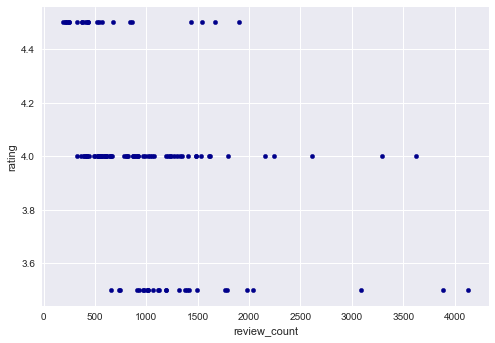

In [249]:
ax1 = target.plot.scatter(x='review_count',
                      y='rating',
                      c='DarkBlue')